In [4]:
!pip install opencv-python
!pip install deepface
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=d5fc066570575564cfc9a9e23b086d88c6d5bc7a906eacd2df0857289301384b
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does n

Enter 1 to upload an image or 2 to capture an image from the camera: 1


Saving WhatsApp Image 2024-07-28 at 09.29.09_59e35f6d.jpg to WhatsApp Image 2024-07-28 at 09.29.09_59e35f6d (2).jpg


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


Analysis Result: [{'age': 34, 'region': {'x': 0, 'y': 0, 'w': 1379, 'h': 1091, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0, 'gender': {'Woman': 6.653251498937607, 'Man': 93.3467447757721}, 'dominant_gender': 'Man'}]


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]


Analysis Result: [{'age': 27, 'region': {'x': 294, 'y': 263, 'w': 499, 'h': 499, 'left_eye': (622, 443), 'right_eye': (438, 443)}, 'face_confidence': 0.93, 'gender': {'Woman': 0.13378055300563574, 'Man': 99.86622333526611}, 'dominant_gender': 'Man'}]


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Analysis Result: [{'age': 34, 'region': {'x': 0, 'y': 0, 'w': 1379, 'h': 1091, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0, 'gender': {'Woman': 6.653251498937607, 'Man': 93.3467447757721}, 'dominant_gender': 'Man'}]


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


Analysis Result: [{'age': 27, 'region': {'x': 294, 'y': 263, 'w': 499, 'h': 499, 'left_eye': (622, 443), 'right_eye': (438, 443)}, 'face_confidence': 0.93, 'gender': {'Woman': 0.13378055300563574, 'Man': 99.86622333526611}, 'dominant_gender': 'Man'}]


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]


Analysis Result: [{'age': 34, 'region': {'x': 0, 'y': 0, 'w': 1379, 'h': 1091, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0, 'gender': {'Woman': 6.653251498937607, 'Man': 93.3467447757721}, 'dominant_gender': 'Man'}]
Gender: Man
Estimated Age: 31.20
Body Proportions (Torso/Leg ratio): 1.22


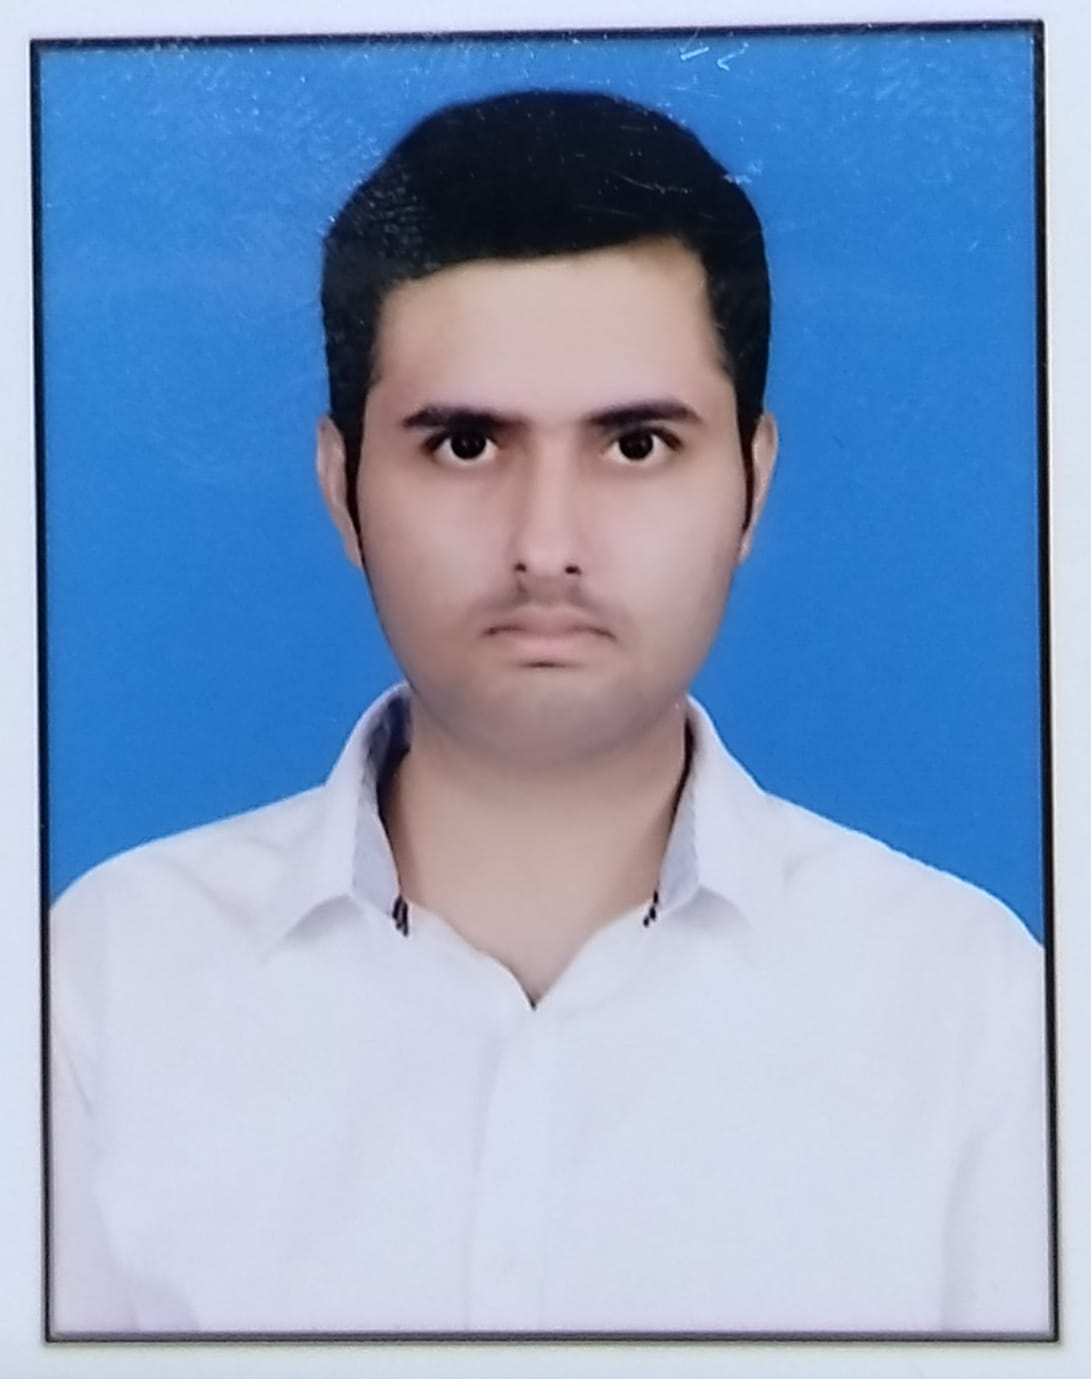

In [42]:
import cv2
from deepface import DeepFace
import mediapipe as mp
from google.colab.patches import cv2_imshow
from google.colab import files
from google.colab import drive
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

def capture_image_from_camera():
    photo_path = take_photo('captured_photo.jpg')
    image = cv2.imread(photo_path)
    return image

def calculate_body_proportions(image):
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    body_proportions = None
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        shoulder_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y
        hip_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP].y
        knee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y

        torso_length = abs(shoulder_y - hip_y)
        leg_length = abs(hip_y - knee_y)
        body_proportions = torso_length / leg_length if leg_length != 0 else None

    return body_proportions

def process_image(image):
    ages = []
    genders = []

    for i in range(5):
        if i % 2 == 0:
            modified_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) if i % 2 == 0 else cv2.flip(image, 1)
        else:
            modified_image = cv2.flip(image, 1)

        try:
            analysis = DeepFace.analyze(modified_image, actions=['age', 'gender'], enforce_detection=False)

            print(f"Analysis Result: {analysis}")

            if isinstance(analysis, list):
                for result in analysis:
                    if isinstance(result, dict):
                        age = result.get('age')
                        gender = result.get('gender')
                        if isinstance(gender, dict):
                            gender = max(gender, key=gender.get)
                        if age is not None:
                            ages.append(age)
                        if gender is not None:
                            genders.append(gender)
                    else:
                        print(f"Unexpected result format: {result}")

        except ValueError as e:
            print(f"Error analyzing image: {e}")

    if ages and genders:
        average_age = np.mean(ages)
        most_common_gender = max(set(genders), key=genders.count) if genders else None

        body_proportions = calculate_body_proportions(image)

        return most_common_gender, average_age, body_proportions
    else:
        return None, None, None

def main():
    choice = input("Enter 1 to upload an image or 2 to capture an image from the camera: ")

    if choice == '1':
        uploaded = files.upload()
        for filename in uploaded.keys():
            image_path = filename
        image = cv2.imread(image_path)

    elif choice == '2':
        image = capture_image_from_camera()

    else:
        print("Invalid choice")
        return

    if image is not None:
        gender, age, body_proportions = process_image(image)
        if gender is not None and age is not None:
            print(f"Gender: {gender}")
            print(f"Estimated Age: {age:.2f}")
            if body_proportions is not None:
                print(f"Body Proportions (Torso/Leg ratio): {body_proportions:.2f}")
            else:
                print("Could not calculate body proportions.")
        else:
            print("Could not detect a face in the image or process it.")

        cv2_imshow(image)
    else:
        print("Failed to load image. Please check the path.")

if __name__ == "__main__":
    main()